#House Price Prediction

Source : https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data

# Import the Dataset from Kaggle

In [ ]:
! pip install -q kaggle

In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 /root/.kaggle/kaggle.json

In [ ]:
! kaggle competitions download -c house-prices-advanced-regression-techniques

  0% 0.00/199k [00:00<?, ?B/s]
100% 199k/199k [00:00<00:00, 91.1MB/s]


In [ ]:
! unzip -q /content/house-prices-advanced-regression-techniques.zip

# Data Exploration

In [ ]:
# Load the Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# read the Dataset
df = pd.read_csv('/content/train.csv')

In [ ]:
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [ ]:
# Read the Description text
with open('/content/data_description.txt') as mytext:
  text = mytext.read()

In [ ]:
print(text)

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

In [ ]:
# find the number of rows and columns
df.shape

(1460, 81)

In [ ]:
# dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
# statistical analysis
df.describe().transpose()

count           mean           std      min        25%  \
Id             1460.0     730.500000    421.610009      1.0     365.75   
MSSubClass     1460.0      56.897260     42.300571     20.0      20.00   
LotFrontage    1201.0      70.049958     24.284752     21.0      59.00   
LotArea        1460.0   10516.828082   9981.264932   1300.0    7553.50   
OverallQual    1460.0       6.099315      1.382997      1.0       5.00   
OverallCond    1460.0       5.575342      1.112799      1.0       5.00   
YearBuilt      1460.0    1971.267808     30.202904   1872.0    1954.00   
YearRemodAdd   1460.0    1984.865753     20.645407   1950.0    1967.00   
MasVnrArea     1452.0     103.685262    181.066207      0.0       0.00   
BsmtFinSF1     1460.0     443.639726    456.098091      0.0       0.00   
BsmtFinSF2     1460.0      46.549315    161.319273      0.0       0.00   
BsmtUnfSF      1460.0     567.240411    441.866955      0.0     223.00   
TotalBsmtSF    1460.0    1057.429452    438.705324      0.0     795.75   
1stFlrSF       1460.0    1162.626712    386.587738    334.0     882.00   
2ndFlrSF       1460.0     346.992466    436.528436      0.0       0.00   
LowQualFinSF   1460.0       5.844521     48.623081      0.0       0.00   
GrLivArea      1460.0    1515.463699    525.480383    334.0    1129.50   
BsmtFullBath   1460.0       0.425342      0.518911      0.0       0.00   
BsmtHalfBath   1460.0       0.057534      0.238753      0.0       0.00   
FullBath       1460.0       1.565068      0.550916      0.0       1.00   
HalfBath       1460.0       0.382877      0.502885      0.0       0.00   
BedroomAbvGr   1460.0       2.866438      0.815778      0.0       2.00   
KitchenAbvGr   1460.0       1.046575      0.220338      0.0       1.00   
TotRmsAbvGrd   1460.0       6.517808      1.625393      2.0       5.00   
Fireplaces     1460.0       0.613014      0.644666      0.0       0.00   
GarageYrBlt    1379.0    1978.506164     24.689725   1900.0    1961.00   
GarageCars     1460.0       1.767123      0.747315      0.0       1.00   
GarageArea     1460.0     472.980137    213.804841      0.0     334.50   
WoodDeckSF     1460.0      94.244521    125.338794      0.0       0.00   
OpenPorchSF    1460.0      46.660274     66.256028      0.0       0.00   
EnclosedPorch  1460.0      21.954110     61.119149      0.0       0.00   
3SsnPorch      1460.0       3.409589     29.317331      0.0       0.00   
ScreenPorch    1460.0      15.060959     55.757415      0.0       0.00   
PoolArea       1460.0       2.758904     40.177307      0.0       0.00   
MiscVal        1460.0      43.489041    496.123024      0.0       0.00   
MoSold         1460.0       6.321918      2.703626      1.0       5.00   
YrSold         1460.0    2007.815753      1.328095   2006.0    2007.00   
SalePrice      1460.0  180921.195890  79442.502883  34900.0  129975.00   

                    50%        75%       max  
Id                730.5    1095.25    1460.0  
MSSubClass         50.0      70.00     190.0  
LotFrontage        69.0      80.00     313.0  
LotArea          9478.5   11601.50  215245.0  
OverallQual         6.0       7.00      10.0  
OverallCond         5.0       6.00       9.0  
YearBuilt        1973.0    2000.00    2010.0  
YearRemodAdd     1994.0    2004.00    2010.0  
MasVnrArea          0.0     166.00    1600.0  
BsmtFinSF1        383.5     712.25    5644.0  
BsmtFinSF2          0.0       0.00    1474.0  
BsmtUnfSF         477.5     808.00    2336.0  
TotalBsmtSF       991.5    1298.25    6110.0  
1stFlrSF         1087.0    1391.25    4692.0  
2ndFlrSF            0.0     728.00    2065.0  
LowQualFinSF        0.0       0.00     572.0  
GrLivArea        1464.0    1776.75    5642.0  
BsmtFullBath        0.0       1.00       3.0  
BsmtHalfBath        0.0       0.00       2.0  
FullBath            2.0       2.00       3.0  
HalfBath            0.0       1.00       2.0  
BedroomAbvGr        3.0       3.00       8.0  
KitchenAbvGr        1.0       1.00       3.0  
T

In [ ]:
# get the columns names
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [ ]:
# get the categorical values
df.select_dtypes(include='object').columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [ ]:
# get the numerical values
df.select_dtypes(include='int').columns

Index(['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [ ]:
# get the length of the number of categorical variable
len(df.select_dtypes(include='object').columns)

43

# Dealing with Missing Data

In [ ]:
# find if there is any missing values
df.isnull().sum().any()

True

In [ ]:
# find the sum of missing values
df.isnull().values.sum()

7829

In [ ]:
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [ ]:
df.columns[df.isnull().any()]

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

In [ ]:
# length of missing values
len(df.columns[df.isnull().any()])

19

<Axes: >

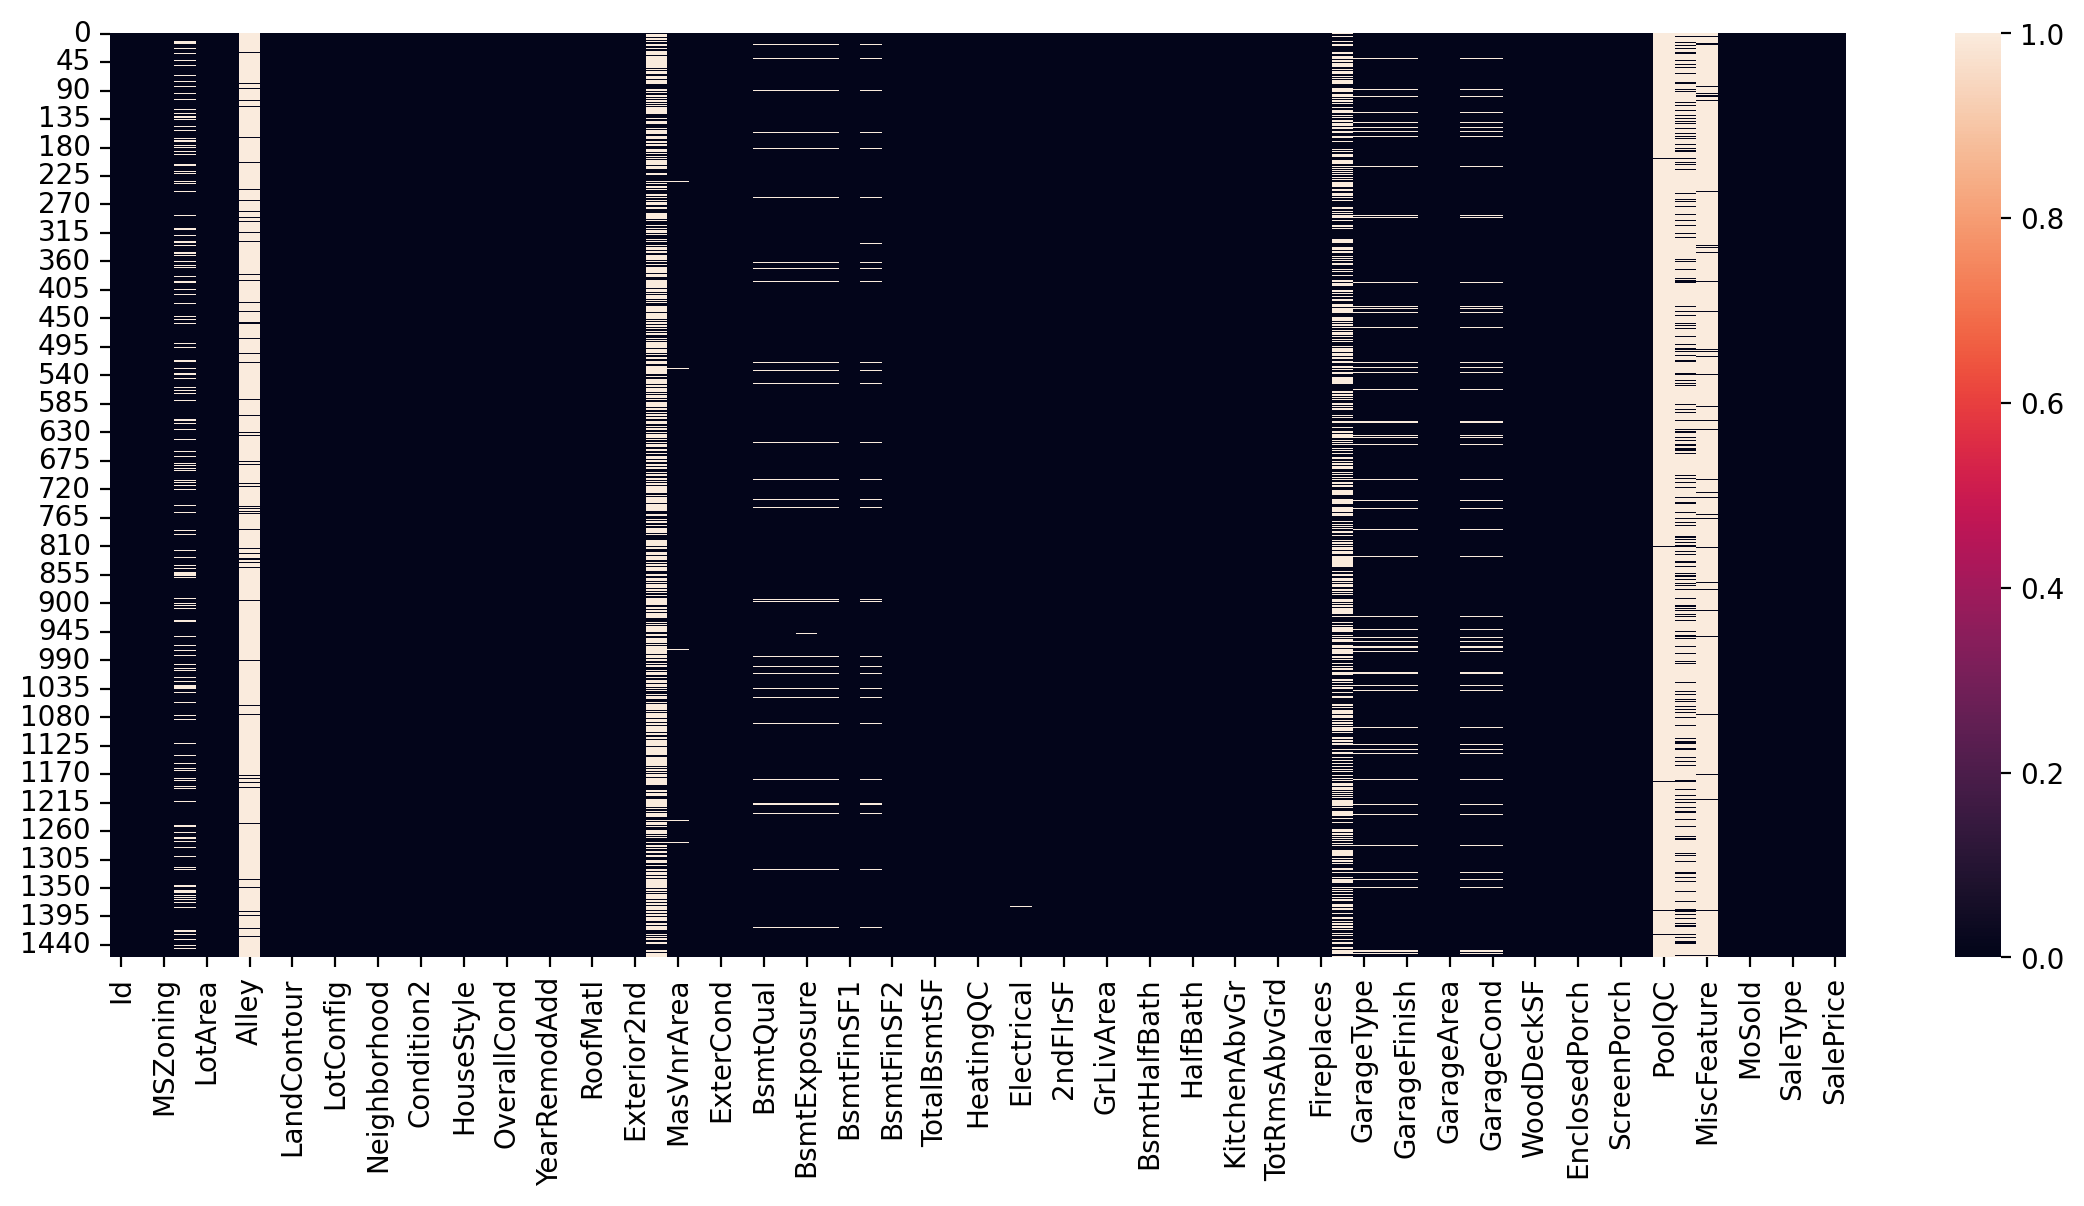

In [ ]:
# plot a heatmap
plt.figure(figsize=(14,6),dpi=200)
sns.heatmap(df.isnull())

In [ ]:
# find the null percentage
null_percentage = df.isnull().sum() / df.shape[0]*100

In [ ]:
null_percentage

Id                0.000000
MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
                   ...    
MoSold            0.000000
YrSold            0.000000
SaleType          0.000000
SaleCondition     0.000000
SalePrice         0.000000
Length: 81, dtype: float64

In [ ]:
# find the columns that have 50% missing data
cols_to_drop = null_percentage[null_percentage > 50]

In [ ]:
cols_to_drop

Alley          93.767123
MasVnrType     59.726027
PoolQC         99.520548
Fence          80.753425
MiscFeature    96.301370
dtype: float64

In [ ]:
cols_to_drop.keys()

Index(['Alley', 'MasVnrType', 'PoolQC', 'Fence', 'MiscFeature'], dtype='object')

In [ ]:
# drop the 50% data missing columns
df = df.drop(columns = ['Alley', 'MasVnrType', 'PoolQC', 'Fence', 'MiscFeature'],axis=1)

In [ ]:
df.shape

(1460, 76)

In [ ]:
df.columns[df.isnull().any()]

Index(['LotFrontage', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu',
       'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual',
       'GarageCond'],
      dtype='object')

In [ ]:
len(df.columns[df.isnull().any()])

14

## Deal with the Missing Numerical and Categorical Columns

### Deal with missing values less than 50% in Numerical Columns

In [ ]:
df.describe().transpose()

count           mean           std      min        25%  \
Id             1460.0     730.500000    421.610009      1.0     365.75   
MSSubClass     1460.0      56.897260     42.300571     20.0      20.00   
LotFrontage    1201.0      70.049958     24.284752     21.0      59.00   
LotArea        1460.0   10516.828082   9981.264932   1300.0    7553.50   
OverallQual    1460.0       6.099315      1.382997      1.0       5.00   
OverallCond    1460.0       5.575342      1.112799      1.0       5.00   
YearBuilt      1460.0    1971.267808     30.202904   1872.0    1954.00   
YearRemodAdd   1460.0    1984.865753     20.645407   1950.0    1967.00   
MasVnrArea     1452.0     103.685262    181.066207      0.0       0.00   
BsmtFinSF1     1460.0     443.639726    456.098091      0.0       0.00   
BsmtFinSF2     1460.0      46.549315    161.319273      0.0       0.00   
BsmtUnfSF      1460.0     567.240411    441.866955      0.0     223.00   
TotalBsmtSF    1460.0    1057.429452    438.705324      0.0     795.75   
1stFlrSF       1460.0    1162.626712    386.587738    334.0     882.00   
2ndFlrSF       1460.0     346.992466    436.528436      0.0       0.00   
LowQualFinSF   1460.0       5.844521     48.623081      0.0       0.00   
GrLivArea      1460.0    1515.463699    525.480383    334.0    1129.50   
BsmtFullBath   1460.0       0.425342      0.518911      0.0       0.00   
BsmtHalfBath   1460.0       0.057534      0.238753      0.0       0.00   
FullBath       1460.0       1.565068      0.550916      0.0       1.00   
HalfBath       1460.0       0.382877      0.502885      0.0       0.00   
BedroomAbvGr   1460.0       2.866438      0.815778      0.0       2.00   
KitchenAbvGr   1460.0       1.046575      0.220338      0.0       1.00   
TotRmsAbvGrd   1460.0       6.517808      1.625393      2.0       5.00   
Fireplaces     1460.0       0.613014      0.644666      0.0       0.00   
GarageYrBlt    1379.0    1978.506164     24.689725   1900.0    1961.00   
GarageCars     1460.0       1.767123      0.747315      0.0       1.00   
GarageArea     1460.0     472.980137    213.804841      0.0     334.50   
WoodDeckSF     1460.0      94.244521    125.338794      0.0       0.00   
OpenPorchSF    1460.0      46.660274     66.256028      0.0       0.00   
EnclosedPorch  1460.0      21.954110     61.119149      0.0       0.00   
3SsnPorch      1460.0       3.409589     29.317331      0.0       0.00   
ScreenPorch    1460.0      15.060959     55.757415      0.0       0.00   
PoolArea       1460.0       2.758904     40.177307      0.0       0.00   
MiscVal        1460.0      43.489041    496.123024      0.0       0.00   
MoSold         1460.0       6.321918      2.703626      1.0       5.00   
YrSold         1460.0    2007.815753      1.328095   2006.0    2007.00   
SalePrice      1460.0  180921.195890  79442.502883  34900.0  129975.00   

                    50%        75%       max  
Id                730.5    1095.25    1460.0  
MSSubClass         50.0      70.00     190.0  
LotFrontage        69.0      80.00     313.0  
LotArea          9478.5   11601.50  215245.0  
OverallQual         6.0       7.00      10.0  
OverallCond         5.0       6.00       9.0  
YearBuilt        1973.0    2000.00    2010.0  
YearRemodAdd     1994.0    2004.00    2010.0  
MasVnrArea          0.0     166.00    1600.0  
BsmtFinSF1        383.5     712.25    5644.0  
BsmtFinSF2          0.0       0.00    1474.0  
BsmtUnfSF         477.5     808.00    2336.0  
TotalBsmtSF       991.5    1298.25    6110.0  
1stFlrSF         1087.0    1391.25    4692.0  
2ndFlrSF            0.0     728.00    2065.0  
LowQualFinSF        0.0       0.00     572.0  
GrLivArea        1464.0    1776.75    5642.0  
BsmtFullBath        0.0       1.00       3.0  
BsmtHalfBath        0.0       0.00       2.0  
FullBath            2.0       2.00       3.0  
HalfBath            0.0       1.00       2.0  
BedroomAbvGr        3.0       3.00       8.0  
KitchenAbvGr        1.0       1.00       3.0  
T

In [ ]:
df.columns[df.isnull().any()]

Index(['LotFrontage', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu',
       'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual',
       'GarageCond'],
      dtype='object')

In [ ]:
# fill the missing values using the mean of the columns
df['LotFrontage'] = df['LotFrontage'].fillna(df['LotFrontage'].mean())
df['MasVnrArea'] = df['MasVnrArea'].fillna(df['MasVnrArea'].mean())
df['GarageYrBlt'] = df['GarageYrBlt'].fillna(df['GarageYrBlt'].mean())

In [ ]:
len(df.columns[df.isnull().any()])

11

### Deal with missing values less than 50% in Categorical columns

In [ ]:
df.select_dtypes(include='object').columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
       'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [ ]:
df.columns[df.isnull().any()]

Index(['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond'],
      dtype='object')

In [ ]:
len(df.columns[df.isnull().any()])

11

In [ ]:
# fill the missing values with mode of the columns
df['BsmtQual'] = df['BsmtQual'].fillna(df['BsmtQual'].mode()[0])
df['BsmtCond'] = df['BsmtCond'].fillna(df['BsmtCond'].mode()[0])
df['BsmtExposure'] = df['BsmtExposure'].fillna(df['BsmtExposure'].mode()[0])
df['BsmtFinType1'] = df['BsmtFinType1'].fillna(df['BsmtFinType1'].mode()[0])
df['BsmtFinType2'] = df['BsmtFinType2'].fillna(df['BsmtFinType2'].mode()[0])
df['Electrical'] = df['Electrical'].fillna(df['Electrical'].mode()[0])
df['FireplaceQu'] = df['FireplaceQu'].fillna(df['FireplaceQu'].mode()[0])
df['GarageType'] = df['GarageType'].fillna(df['GarageType'].mode()[0])
df['GarageFinish'] = df['GarageFinish'].fillna(df['GarageFinish'].mode()[0])
df['GarageQual'] = df['GarageQual'].fillna(df['GarageQual'].mode()[0])
df['GarageCond'] = df['GarageCond'].fillna(df['GarageCond'].mode()[0])

In [ ]:
len(df.columns[df.isnull().any()])

0

# Data Visualization

In [ ]:
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0   1          60       RL         65.0     8450   Pave      Reg         Lvl   
1   2          20       RL         80.0     9600   Pave      Reg         Lvl   
2   3          60       RL         68.0    11250   Pave      IR1         Lvl   
3   4          70       RL         60.0     9550   Pave      IR1         Lvl   
4   5          60       RL         84.0    14260   Pave      IR1         Lvl   

  Utilities LotConfig  ... EnclosedPorch 3SsnPorch ScreenPorch PoolArea  \
0    AllPub    Inside  ...             0         0           0        0   
1    AllPub       FR2  ...             0         0           0        0   
2    AllPub    Inside  ...             0         0           0        0   
3    AllPub    Corner  ...           272         0           0        0   
4    AllPub       FR2  ...             0         0           0        0   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
0       0      2    2008        WD         Normal     208500  
1       0      5    2007        WD         Normal     181500  
2       0      9    2008        WD         Normal     223500  
3       0      2    2006        WD        Abnorml     140000  
4       0     12    2008        WD         Normal     250000  

[5 rows x 76 columns]

# Data Correlation with the Label

<Axes: >

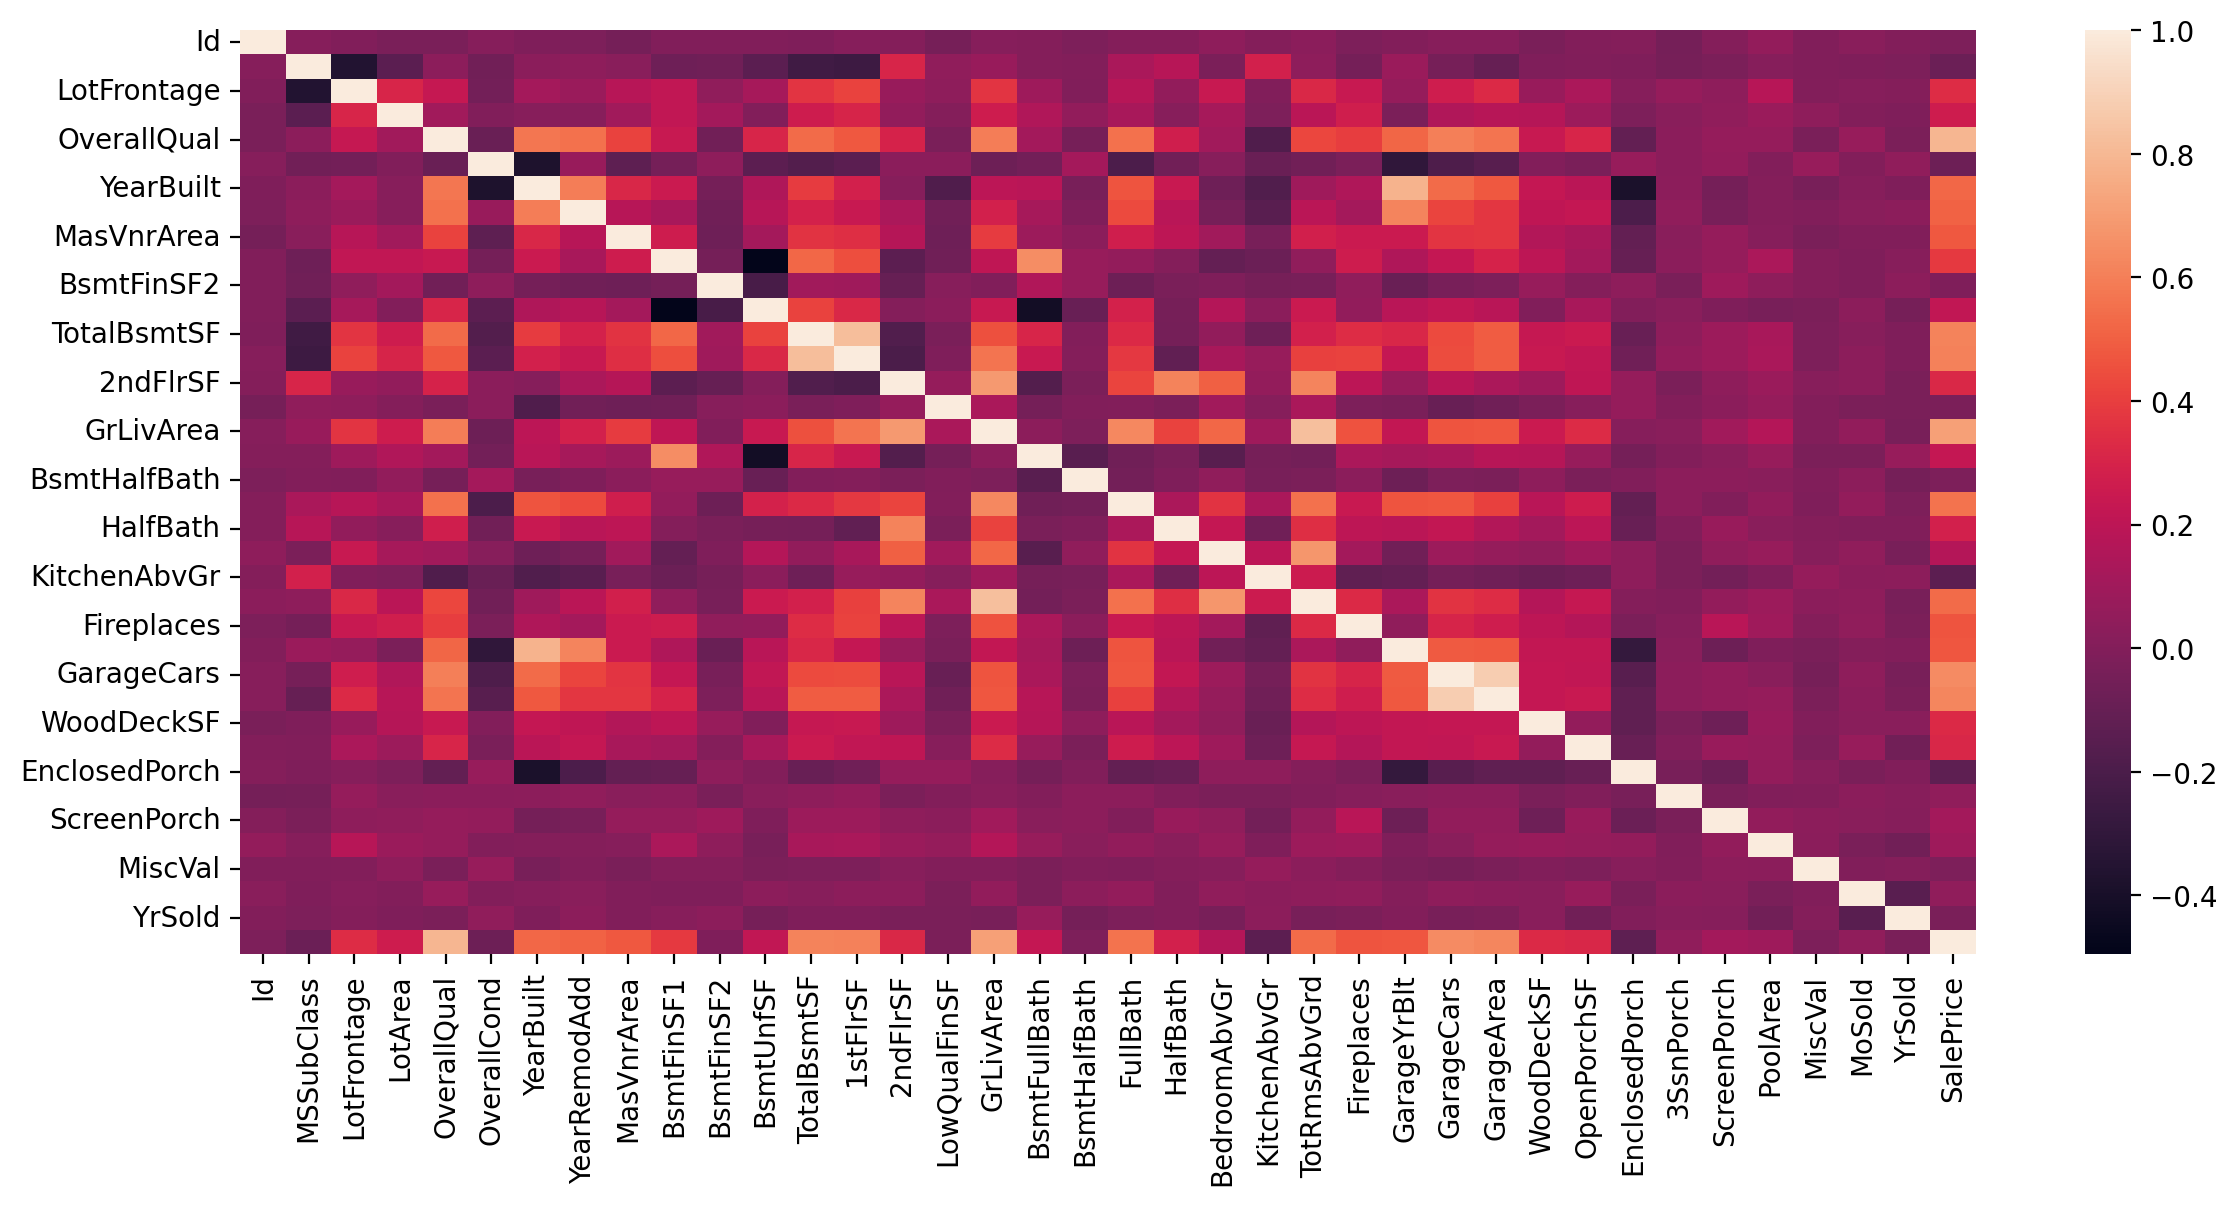

In [ ]:
# plot heatmap
plt.figure(figsize=(14,6),dpi=200)
sns.heatmap(df.corr(numeric_only=True))

In [ ]:
# find the features that are highly correlated
df.corr(numeric_only=True)['SalePrice'].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
MasVnrArea       0.475241
GarageYrBlt      0.470177
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.334901
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

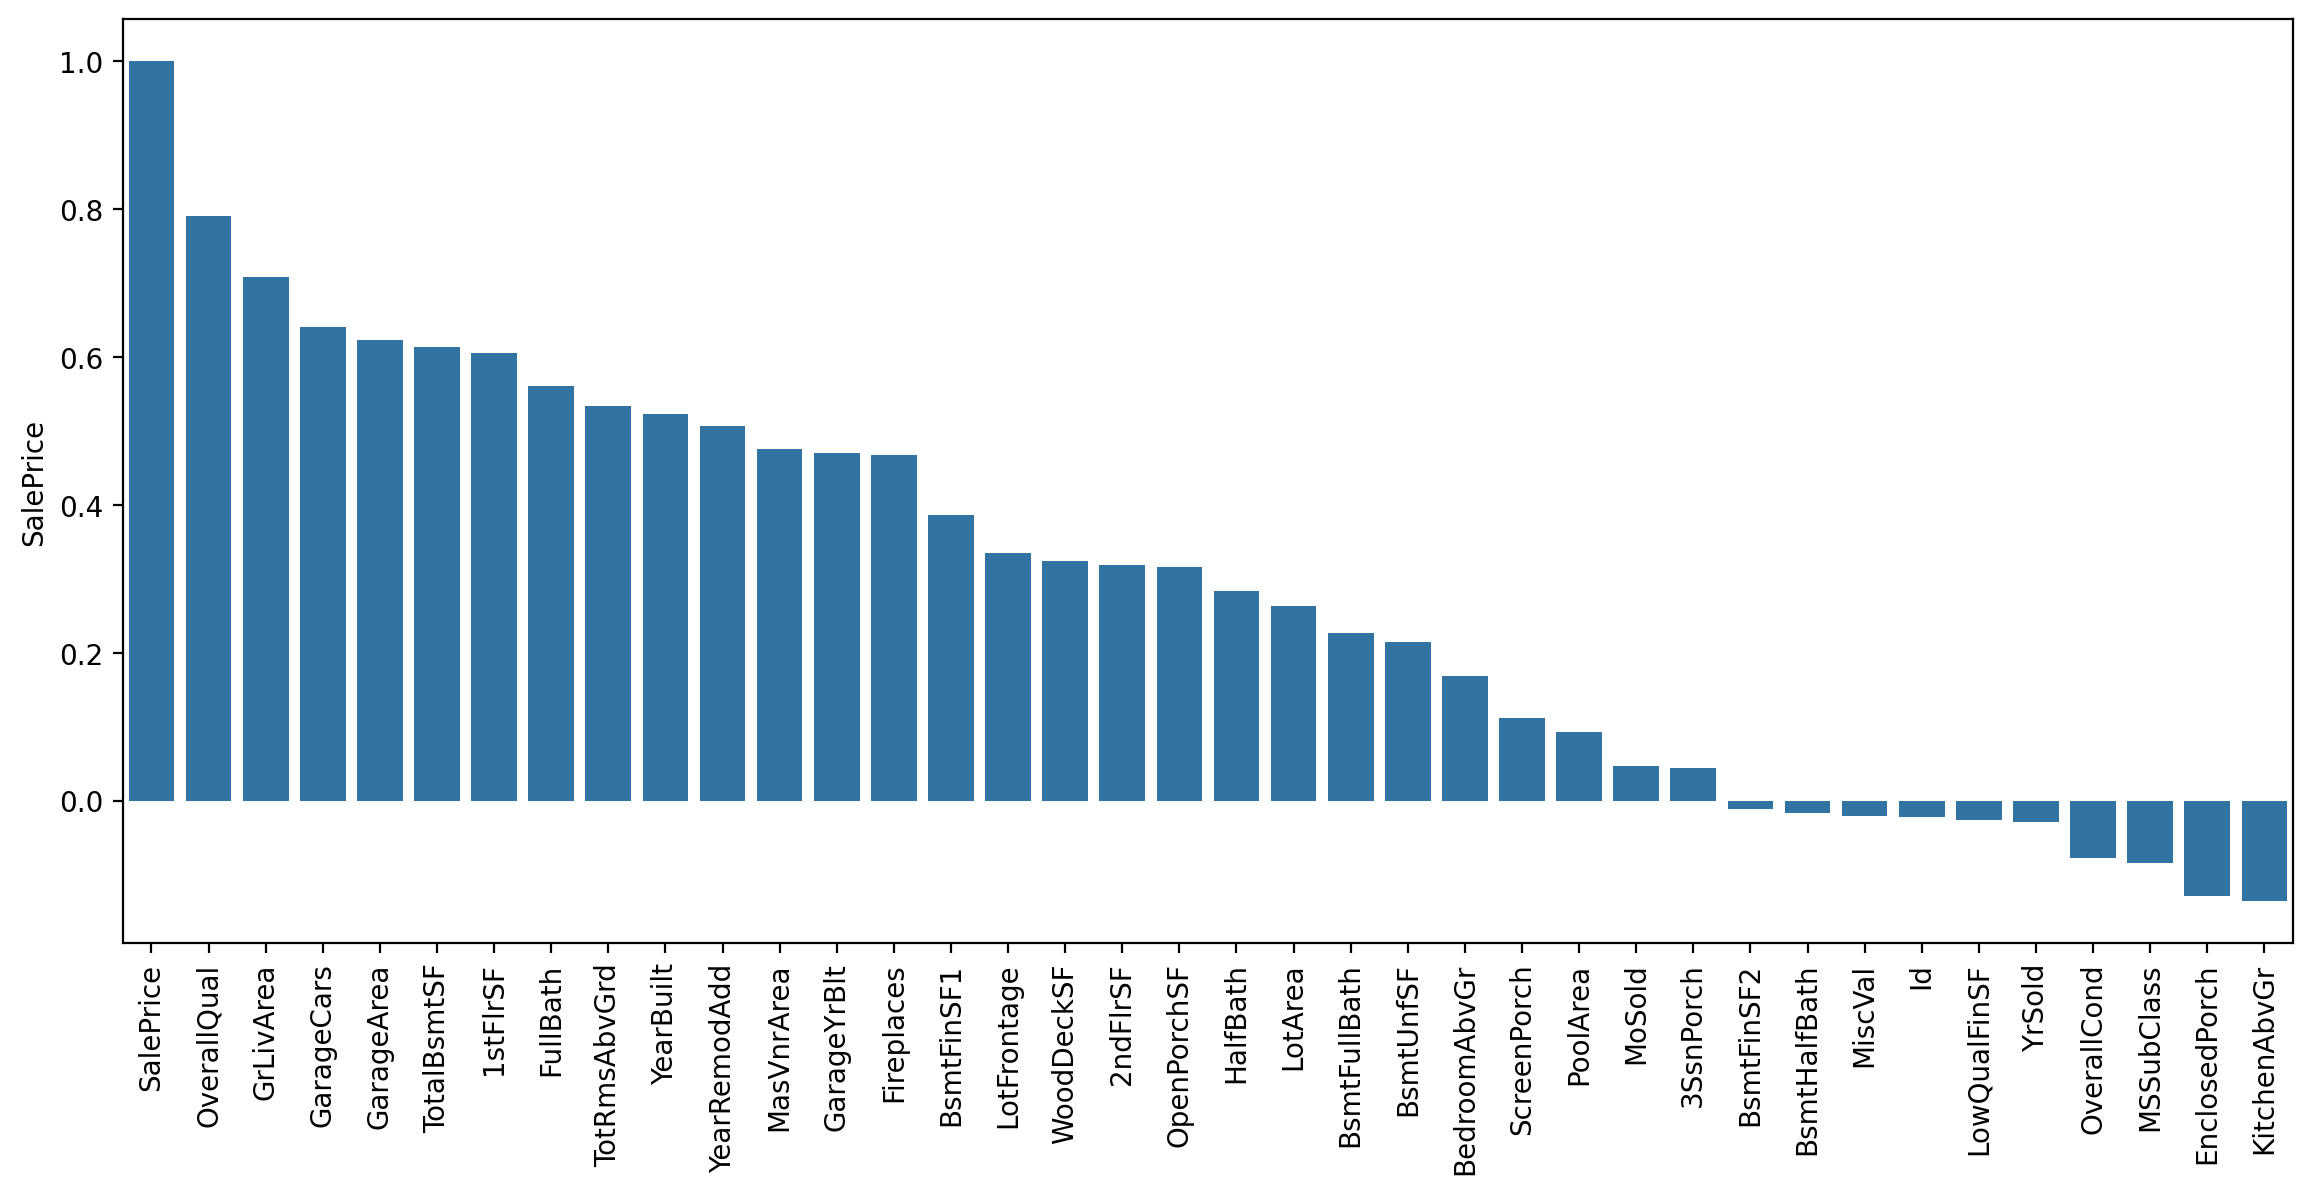

In [ ]:
# plot a barplot
plt.figure(figsize=(14,6),dpi=200)
sns.barplot(df.corr(numeric_only=True)['SalePrice'].sort_values(ascending=False))
plt.xticks(rotation=90);

<Figure size 3200x1800 with 0 Axes>

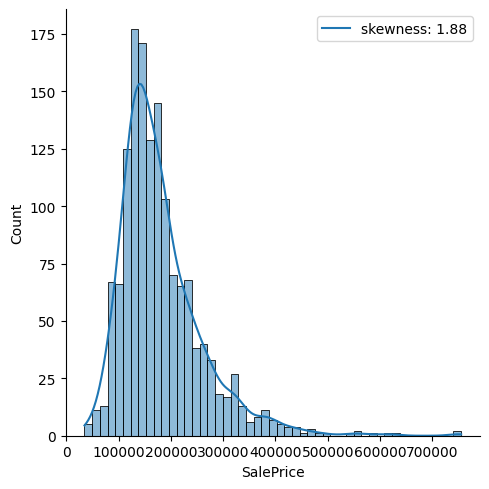

In [ ]:
# plot a displot
plt.figure(figsize=(16,9),dpi=200)
sns.displot(df['SalePrice'],kde=True)
plt.legend(['skewness: {:.2f}'.format(df['SalePrice'].skew())])

In [ ]:
# find correlation of the features with SalePrice
sales = df.drop('SalePrice',axis=1)

<Axes: title={'center': 'Correlated with SalePrice'}>

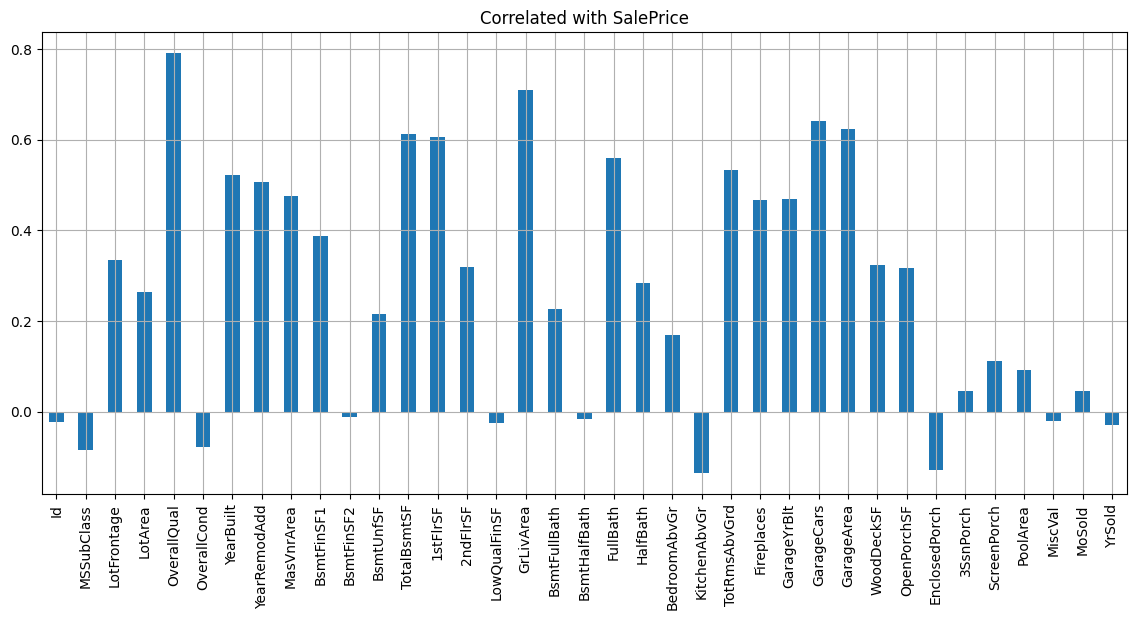

In [ ]:
# plot a correlation plot
sales.corrwith(df['SalePrice'],numeric_only=True).plot.bar(figsize=(14,6),title='Correlated with SalePrice',grid=True)

<Axes: >

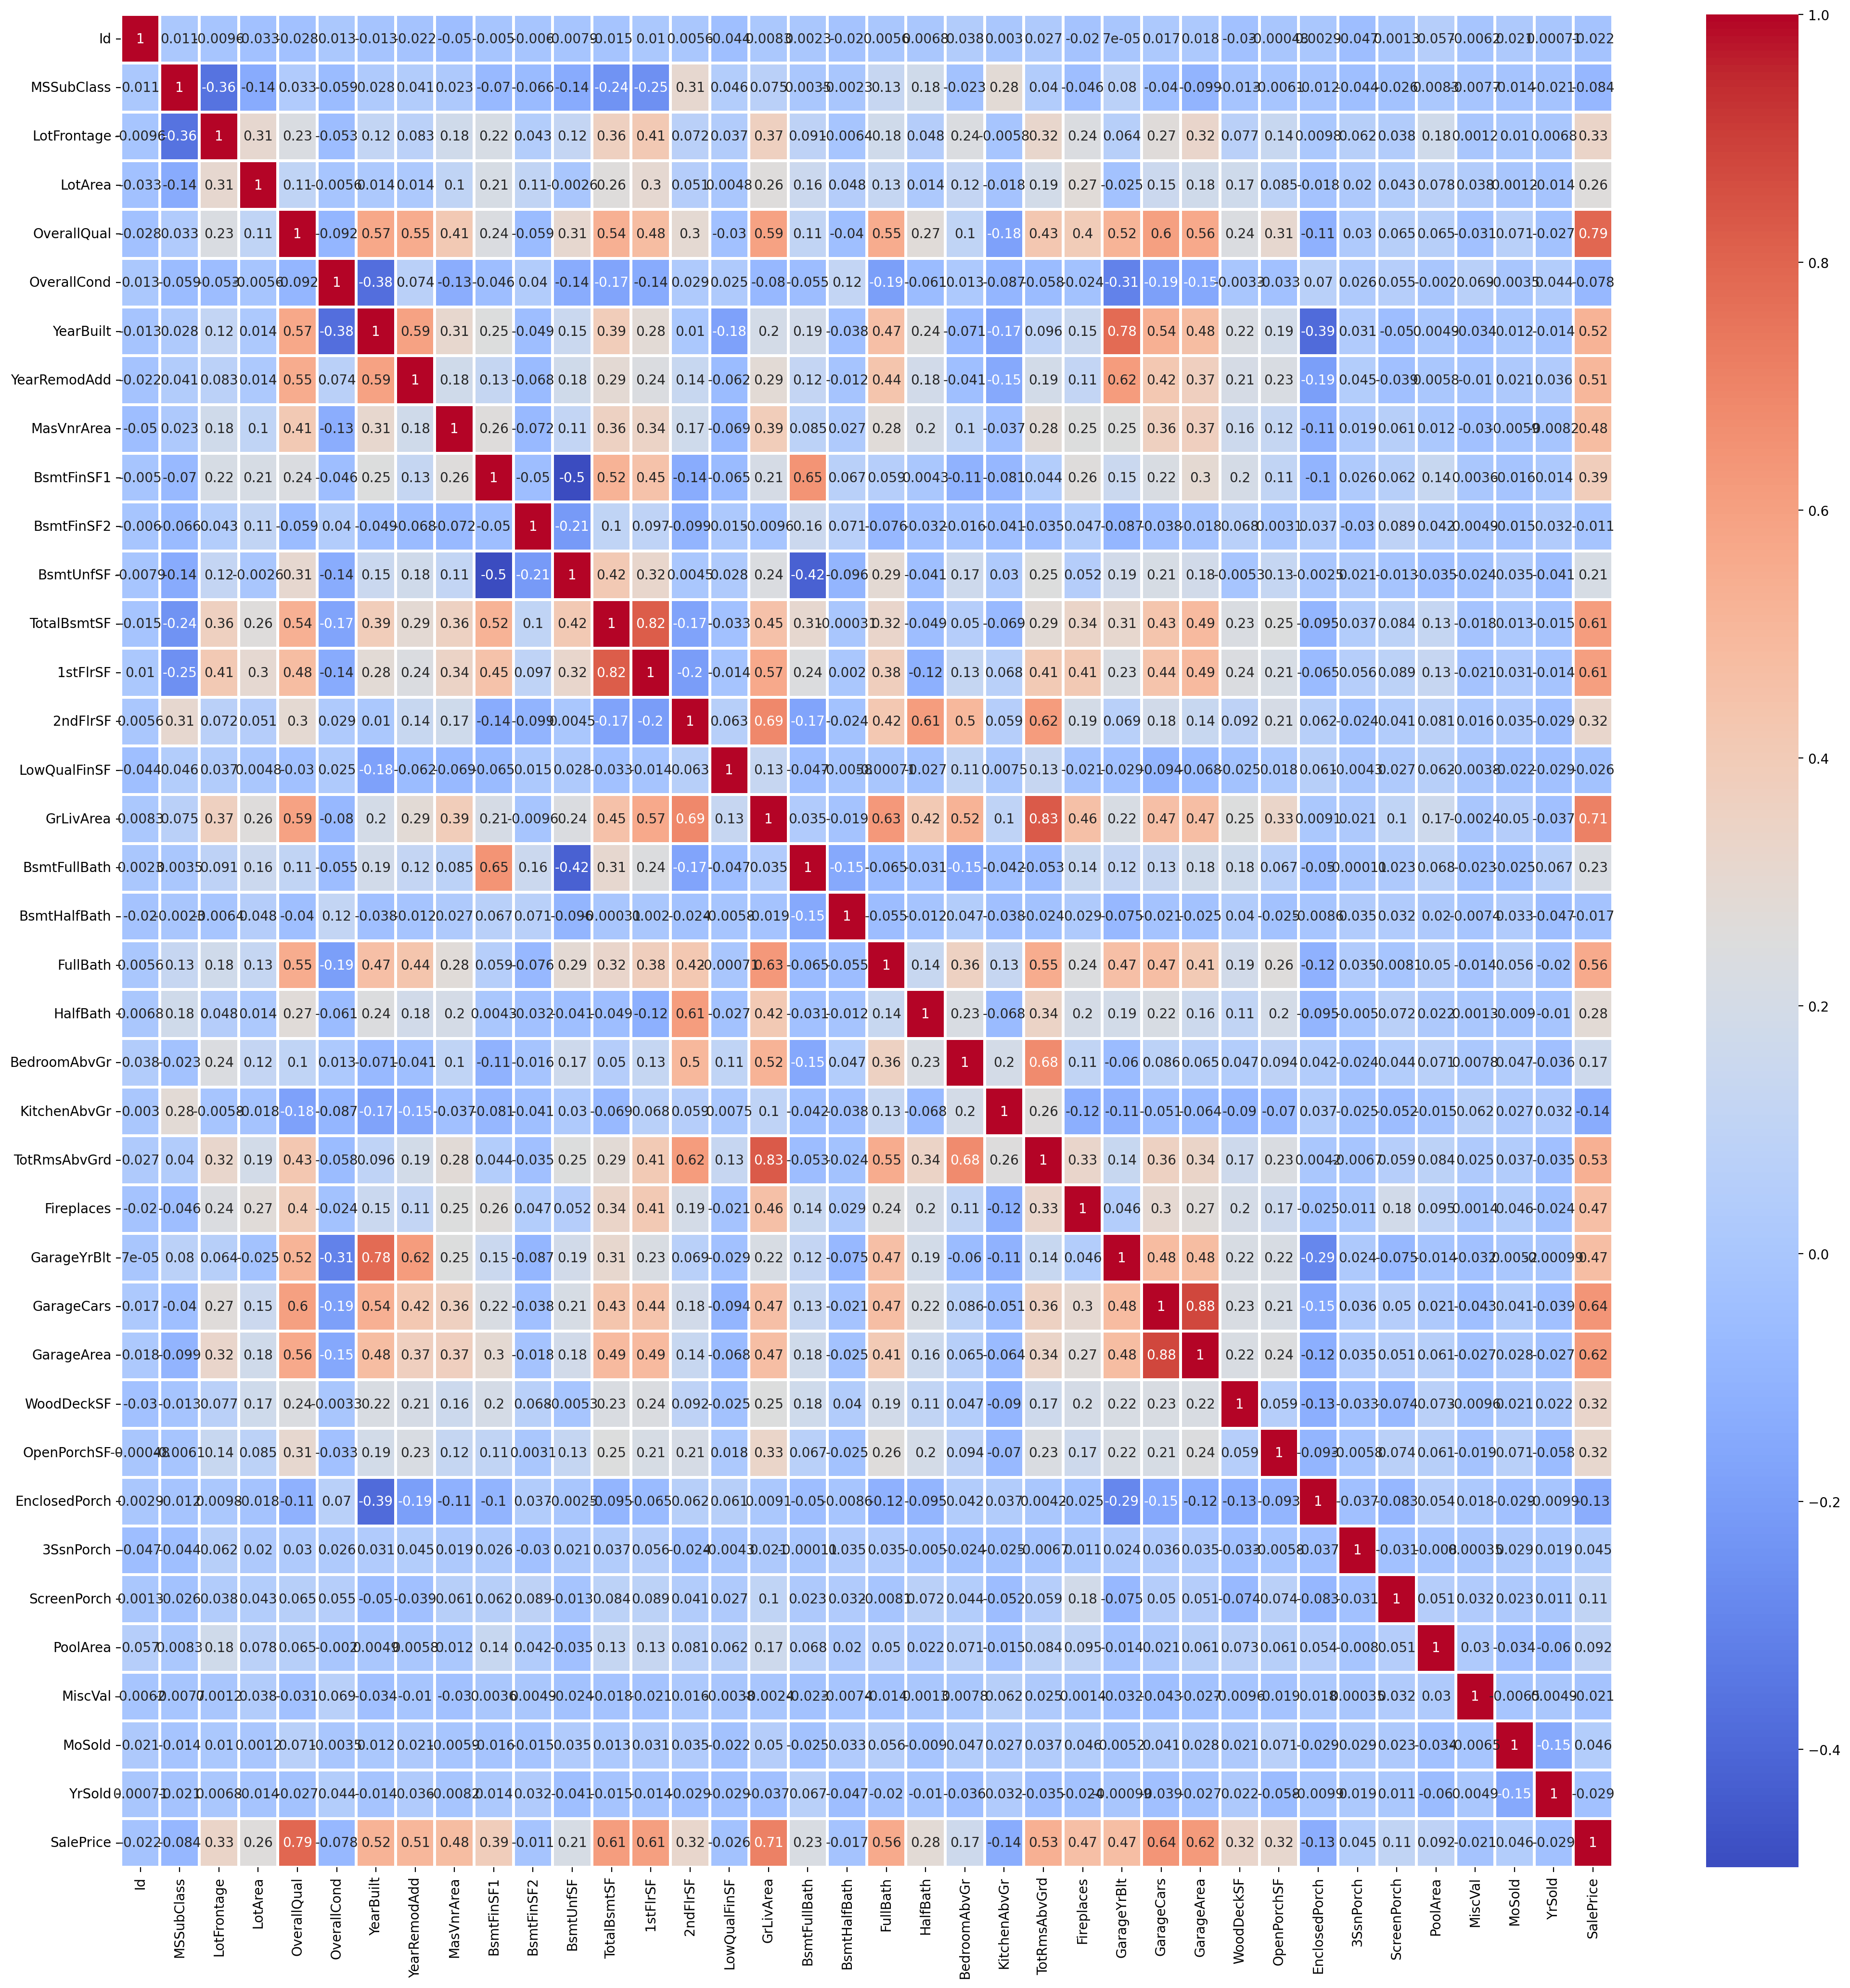

In [ ]:
# plot heatmap
plt.figure(figsize=(25,25),dpi=200)
sns.heatmap(df.corr(numeric_only=True),annot=True,lw=2,cmap='coolwarm')

In [ ]:
# find correlations above 50 percent
 (df.corr(numeric_only=True)['SalePrice'].sort_values(ascending=False) > 0.5)

SalePrice         True
OverallQual       True
GrLivArea         True
GarageCars        True
GarageArea        True
TotalBsmtSF       True
1stFlrSF          True
FullBath          True
TotRmsAbvGrd      True
YearBuilt         True
YearRemodAdd      True
MasVnrArea       False
GarageYrBlt      False
Fireplaces       False
BsmtFinSF1       False
LotFrontage      False
WoodDeckSF       False
2ndFlrSF         False
OpenPorchSF      False
HalfBath         False
LotArea          False
BsmtFullBath     False
BsmtUnfSF        False
BedroomAbvGr     False
ScreenPorch      False
PoolArea         False
MoSold           False
3SsnPorch        False
BsmtFinSF2       False
BsmtHalfBath     False
MiscVal          False
Id               False
LowQualFinSF     False
YrSold           False
OverallCond      False
MSSubClass       False
EnclosedPorch    False
KitchenAbvGr     False
Name: SalePrice, dtype: bool

In [ ]:
high_corr = df.corr(numeric_only=True)

In [ ]:
high_corr_features = high_corr.index[(abs(high_corr['SalePrice']) > 0.5)]

In [ ]:
high_corr_features

Index(['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF',
       'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea',
       'SalePrice'],
      dtype='object')

In [ ]:
(df.corr(numeric_only=True)['SalePrice'].sort_values(ascending=False) > 0.5)

SalePrice         True
OverallQual       True
GrLivArea         True
GarageCars        True
GarageArea        True
TotalBsmtSF       True
1stFlrSF          True
FullBath          True
TotRmsAbvGrd      True
YearBuilt         True
YearRemodAdd      True
MasVnrArea       False
GarageYrBlt      False
Fireplaces       False
BsmtFinSF1       False
LotFrontage      False
WoodDeckSF       False
2ndFlrSF         False
OpenPorchSF      False
HalfBath         False
LotArea          False
BsmtFullBath     False
BsmtUnfSF        False
BedroomAbvGr     False
ScreenPorch      False
PoolArea         False
MoSold           False
3SsnPorch        False
BsmtFinSF2       False
BsmtHalfBath     False
MiscVal          False
Id               False
LowQualFinSF     False
YrSold           False
OverallCond      False
MSSubClass       False
EnclosedPorch    False
KitchenAbvGr     False
Name: SalePrice, dtype: bool

<Axes: >

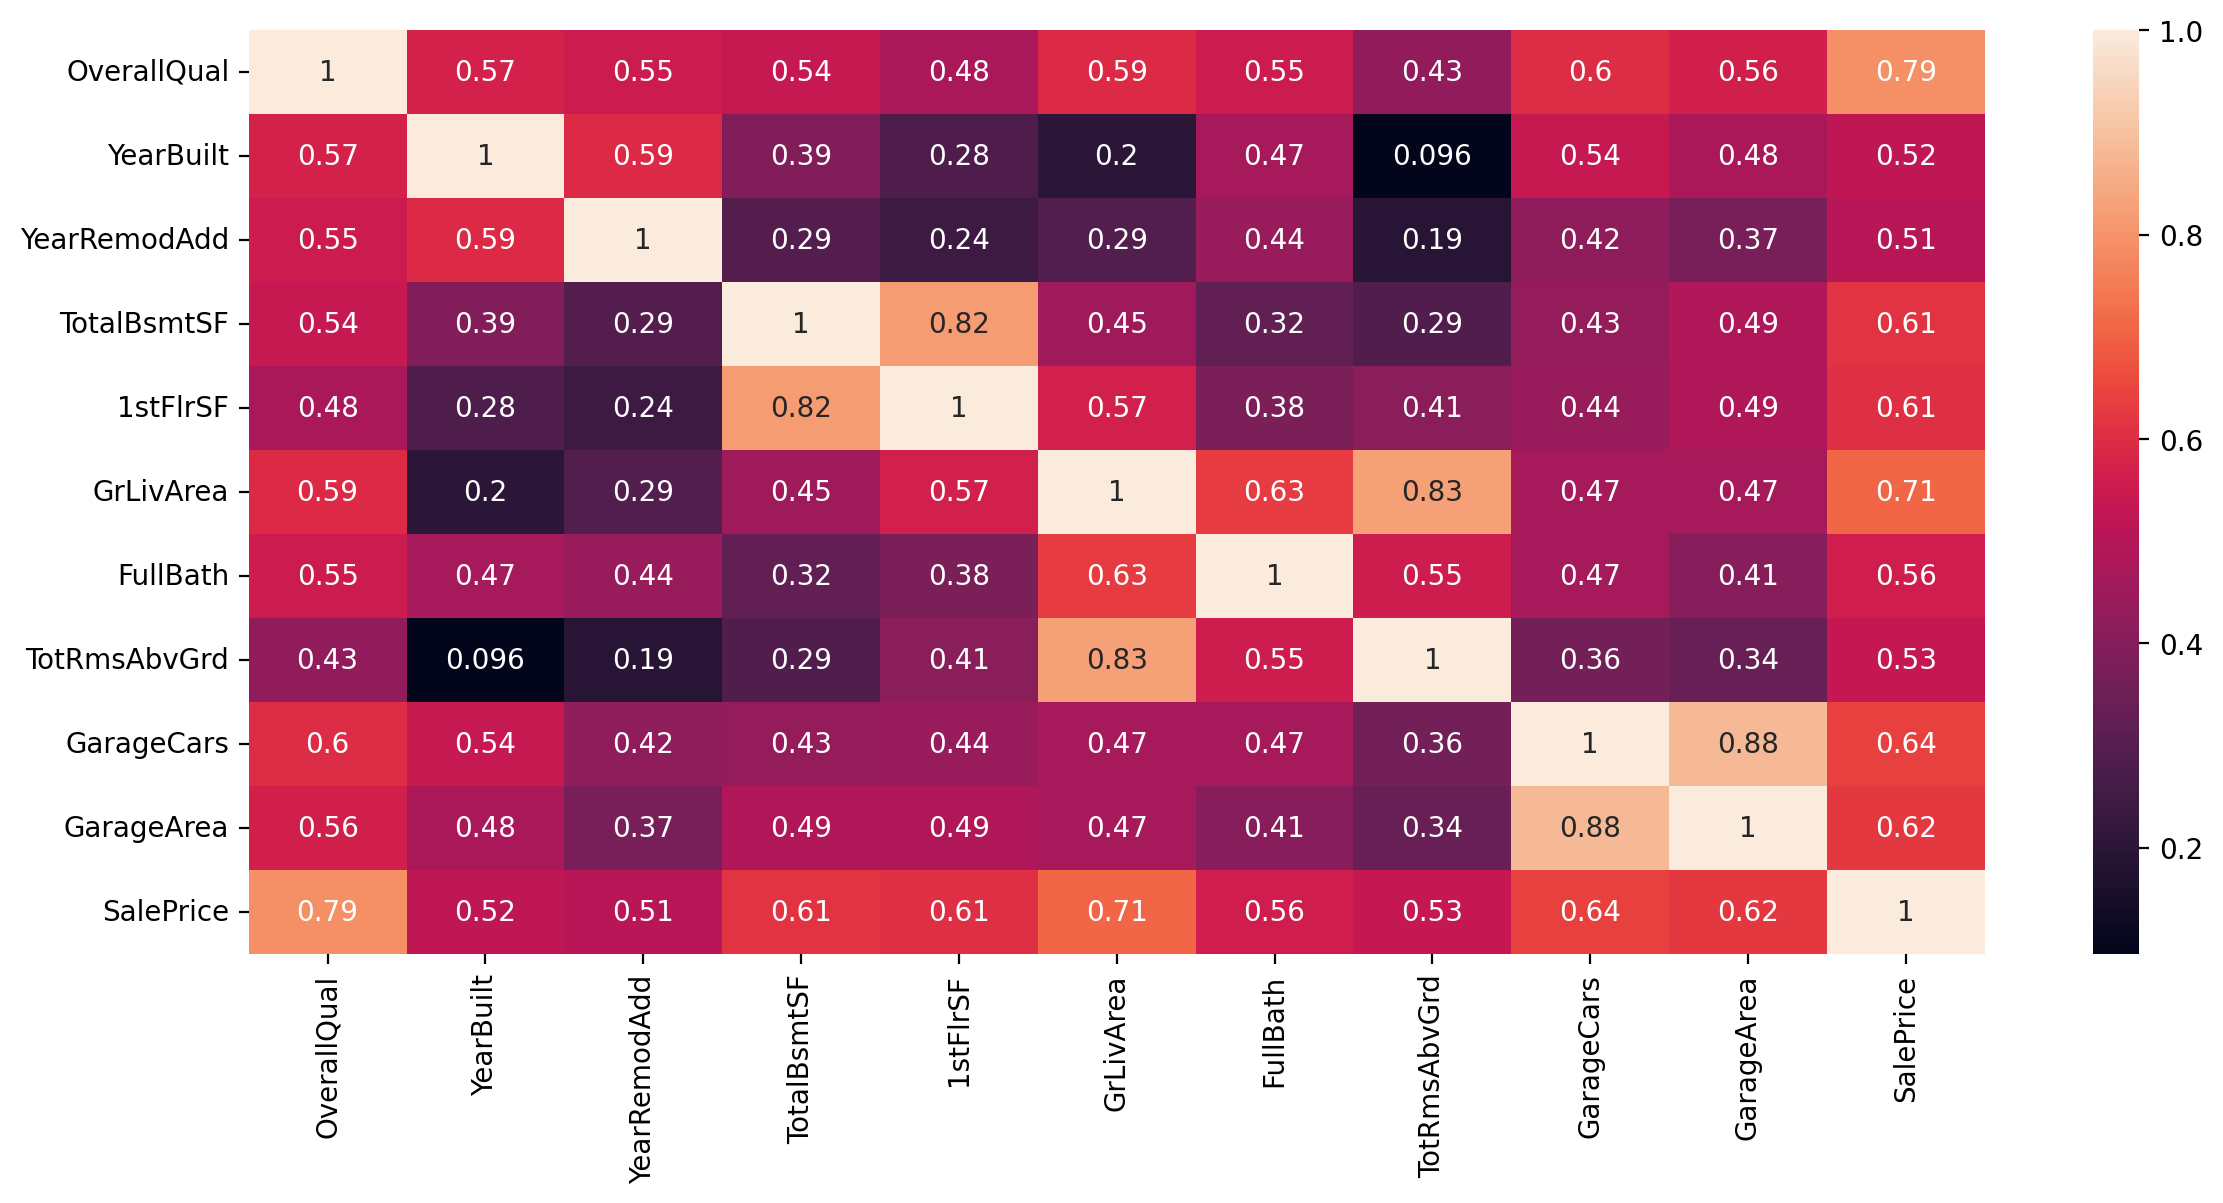

In [ ]:
plt.figure(figsize=(14,6),dpi=200)
sns.heatmap(df[high_corr_features].corr(numeric_only=True),annot=True)

# Deal with Catogorical Columns or One Hot Encoding

In [ ]:
df.select_dtypes(include='object').columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
       'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [ ]:
# one hot encoding
df = pd.get_dummies(data=df,drop_first=True)

In [ ]:
df.shape

(1460, 235)

In [ ]:
df.select_dtypes(include='object').columns

Index([], dtype='object')

In [ ]:
len(df.select_dtypes(include='object').columns)

0

# Split the Dataset

In [ ]:
# split dataset into features and labels
X = df.drop('SalePrice',axis=1)
y = df['SalePrice']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# train and test split
X_train, X_test, y_train, y_test = train_test_split(X , y , test_size=0.3, random_state=101)

In [ ]:
from sklearn.preprocessing import StandardScaler

# Scaling the Features

In [ ]:
# scaling the features
scaler = StandardScaler()

In [ ]:
scaled_X_train = scaler.fit_transform(X_train)

In [ ]:
scaled_X_test = scaler.transform(X_test)

# Model Building

## Multiple Linear Regression / Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
linear_model = LinearRegression()

In [ ]:
linear_model.fit(scaled_X_train,y_train)

LinearRegression()

In [ ]:
y_pred = linear_model.predict(scaled_X_test)

### Evaluate the Linear Regression Model

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [ ]:
mean_absolute_error(y_test,y_pred)

5648538909112.897

In [ ]:
np.sqrt(mean_squared_error(y_test,y_pred))

115122953077529.95

In [ ]:
r2_score(y_test,y_pred)

-2.1060935378342116e+18

## Random forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
rf_model = RandomForestRegressor()

In [ ]:
rf_model.fit(scaled_X_train,y_train)

RandomForestRegressor()

In [ ]:
y_pred = model_rf.predict(scaled_X_test)

### Evaluate the Random Forest Model

In [ ]:
r2_score(y_test,y_pred)

0.841389164975045

## XGBoost

In [ ]:
from xgboost import XGBRFRegressor
xgb_model = XGBRFRegressor()
xgb_model.fit(scaled_X_train,y_train)

XGBRFRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bytree=None, device=None,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, feature_types=None, gamma=None,
               grow_policy=None, importance_type=None,
               interaction_constraints=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=None, n_jobs=None,
               num_parallel_tree=None, objective='reg:squarederror',
               random_state=None, reg_alpha=None, ...)

In [ ]:
y_pred = xgb_model.predict(scaled_X_test)

### Evaluate the XGBoost Model

In [ ]:
r2_score(y_test,y_pred)

0.8269240050557102

# Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
model_rf = RandomForestRegressor()

In [ ]:
parameters = {'n_estimators':[200,400,600,800,1000,1400,1600,1800,2000],
              'max_depth': [10,20,30,40,50,60,70,80,90,100,None],
              'min_samples_split': [2,5,10],
              'min_samples_leaf': [1,2,4],
              'max_features':['sqrt','log2',None],
              'bootstrap':[True,False],
              'oob_score':[True,False]}

In [ ]:
random_cv = RandomizedSearchCV(estimator=model_rf,param_distributions=parameters,n_iter=50,cv=5)

In [ ]:
random_cv.fit(scaled_X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
90 fits failed out of a total of 250.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
90 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py", line 434, in fit
    raise ValueError("Out of bag estimation only available if bootstrap=True")
ValueError: Out of bag estimation only available if bootstrap=True

  warnings.warn(some_fits_failed_message, FitFailedWarning)
/usr/local/li

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=50,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, None],
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1400, 1600, 1800,
                                                         2000],
                                        'oob_score': [True, False]})

In [ ]:
random_cv.best_estimator_

RandomForestRegressor(max_depth=40, max_features='sqrt', n_estimators=1000,
                      oob_score=True)

In [ ]:
# gives best parameters to improve on the performance of the model
random_cv.best_params_

{'oob_score': True,
 'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 40,
 'bootstrap': True}

# Final model

In [ ]:
rf = RandomForestRegressor(n_estimators=1000,min_samples_split=2,min_samples_leaf=1,max_features='sqrt',
                           max_depth=40,bootstrap=True,oob_score=True)

In [ ]:
rf.fit(scaled_X_train,y_train)

RandomForestRegressor(max_depth=40, max_features='sqrt', n_estimators=1000,
                      oob_score=True)

In [ ]:
y_pred = rf.predict(scaled_X_test)

In [ ]:
r2_score(y_test,y_pred)

0.8262302424235336